In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


import keras
from keras.utils import to_categorical
from keras import layers
from keras.layers.regularization.dropout import Dropout
from keras import models
from keras.optimizers import SGD

from tensorflow.python.client import device_lib

from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm

In [78]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10496645012499826480
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5915021312
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17941118710648559896
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [79]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


In [80]:
df = pd.read_csv('../Data/reviews_with_sentiment.csv')
df.head()

,overall,reviewText,asin,sentiment
0,5,I don't spend a lot on my flags because they r...,9539723809,0.9514
1,5,"Super fast processing and shipping, if you are...",9539723809,0.8748
2,5,Great product. I would recommend this product...,9539723809,0.8442
3,5,GREAT PRICE I LOVE MY STATE AND COUNTRY,9539723809,0.8519
4,5,Great display flag for the den.,9539723809,0.6249


In [81]:
train_text, test_text, train_y, test_y = train_test_split(df['reviewText'].values,df['overall'].values, test_size=0.25, random_state=1000)

In [82]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

train_y

array([[0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [83]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_text)

train_x = tokenizer.texts_to_sequences(train_text)
test_x = tokenizer.texts_to_sequences(test_text)

vocab_size = len(tokenizer.word_index) + 1

In [84]:
print(train_text[2])

print(train_x[2])

Arrived in a little box with three leaves. I repotted it and put in a sunny window do to wintertime here now. It has taken off producing a new leaf every week. Looks good and healthy. Happy with this purchase.
[273, 11, 5, 73, 215, 14, 292, 284, 3, 6, 2, 89, 11, 5, 2294, 675, 60, 4, 274, 91, 6, 59, 1299, 75, 3326, 5, 132, 831, 178, 314, 162, 30, 2, 766, 191, 14, 8, 226]


In [85]:
for word in ['testing', 'if', 'words', 'token']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

testing: 1794
if: 37
words: 2352
token: 37365


In [86]:
print(max(map(len, train_x)))

print(max(map(len, test_x)))

5255
5090


In [87]:
maxlen = 5255

train_x = pad_sequences(train_x, padding='post', maxlen=maxlen)
test_x = pad_sequences(test_x, padding='post', maxlen=maxlen)

print(train_x[0, :])

[221  63 208 ...   0   0   0]


In [89]:
print(max(map(len, train_x)))
print(max(map(len, test_x)))

5255
5255


In [91]:
embedding_dim = 100

model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5255, 100)         11027800  
                                                                 
 conv1d (Conv1D)             (None, 5251, 128)         64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 11,093,284
Trainable params: 11,093,284
Non-trainable params: 0
____________________________________________

In [92]:
history = model.fit(train_x, train_y,
                    epochs=10,
                    validation_data=(test_x, test_y),
                    batch_size=10)

Epoch 1/10
59868/59868 [==============================] - 1111s 18ms/step - loss: 0.2047 - accuracy: 0.7329 - val_loss: 0.2003 - val_accuracy: 0.7378
Epoch 2/10
59868/59868 [==============================] - 1049s 18ms/step - loss: 0.1882 - accuracy: 0.7550 - val_loss: 0.1912 - val_accuracy: 0.7520
Epoch 3/10
59868/59868 [==============================] - 1051s 18ms/step - loss: 0.1796 - accuracy: 0.7676 - val_loss: 0.1900 - val_accuracy: 0.7537
Epoch 4/10
59868/59868 [==============================] - 1050s 18ms/step - loss: 0.1709 - accuracy: 0.7808 - val_loss: 0.1950 - val_accuracy: 0.7520
Epoch 5/10
59868/59868 [==============================] - 1050s 18ms/step - loss: 0.1624 - accuracy: 0.7930 - val_loss: 0.1963 - val_accuracy: 0.7538
Epoch 6/10
59868/59868 [==============================] - 1052s 18ms/step - loss: 0.1542 - accuracy: 0.8053 - val_loss: 0.2024 - val_accuracy: 0.7494
Epoch 7/10
59868/59868 [==============================] - 1051s 18ms/step - loss: 0.1467 - accuracy:

In [93]:
model.save("../Model/model.h5")

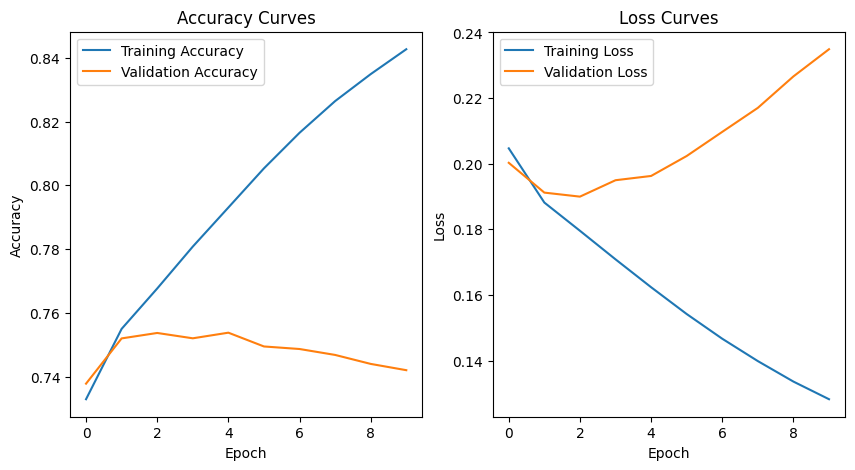

In [95]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [97]:
results = model.evaluate(test_x, test_y)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

6237/6237 [==============================] - 59s 9ms/step - loss: 0.2349 - accuracy: 0.7420
Test set loss: 0.23, test set accuracy: 74.20%


In [131]:
test_input = tokenizer.texts_to_sequences("the product is really bad, it doesnt work propperly and broke, sending back!")

In [132]:
test_input = pad_sequences(test_input, padding='post', maxlen=maxlen)

In [133]:
pred = model.predict(test_input)

3/3 [==============================] - 0s 21ms/step


In [134]:
pred_rating = tf.argmax(pred,1)

In [135]:
print(pred_rating)

tf.Tensor(
[3 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 3 5 5 5 5 5 5 3 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5
 5 5], shape=(76,), dtype=int64)
